# RIZKI NABIL AUFA - 1301194192
### TUGAS WEEK 9 - WORDCLOUD

In [2]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
import re
from PIL import Image

# Dataset yang digunakan adalah data tweet akun joe biden

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/rizkinabil/joe-bidden-tweets/main/JoeBidenTweets.csv')
df.head()

,id,timestamp,url,tweet,replies,retweets,quotes,likes
0,361388562,2007-10-24 22:45,https://twitter.com/JoeBiden/status/361388562,Tune in 11:30 ET tomorrow for a live webcast o...,19,5,17,11
1,543984392,2007-12-29 15:35,https://twitter.com/JoeBiden/status/543984392,"Iowans, there's a good chance there's a Biden ...",13,16,6,22
2,189287227321356289,2012-04-09 09:42,https://twitter.com/JoeBiden/status/1892872273...,We're excited to announce that @JoeBiden is be...,21,82,1,20
3,189287350034104320,2012-04-09 09:43,https://twitter.com/JoeBiden/status/1892873500...,Campaign staff will run this account to keep y...,144,76,37,51
4,189339650610036736,2012-04-09 13:11,https://twitter.com/JoeBiden/status/1893396506...,News for you this morning: VP Biden will speak...,10,54,0,5


In [4]:
pd.options.display.max_colwidth = 200 
df.head()

,id,timestamp,url,tweet,replies,retweets,quotes,likes
0,361388562,2007-10-24 22:45,https://twitter.com/JoeBiden/status/361388562,Tune in 11:30 ET tomorrow for a live webcast of Families USA Presidential Forum on health care: http://presidentialforums.health08.org/,19,5,17,11
1,543984392,2007-12-29 15:35,https://twitter.com/JoeBiden/status/543984392,"Iowans, there's a good chance there's a Biden near you today on a cool 14 F day: http://blog.joebiden.com/?p=1625",13,16,6,22
2,189287227321356289,2012-04-09 09:42,https://twitter.com/JoeBiden/status/189287227321356289,We're excited to announce that @JoeBiden is being rebooted for the 2012 campaign season to give you news of the Vice President on the trail.,21,82,1,20
3,189287350034104320,2012-04-09 09:43,https://twitter.com/JoeBiden/status/189287350034104320,"Campaign staff will run this account to keep you up to date on what the VP's up to, but you'll see occasional tweets from Joe himself, too.",144,76,37,51
4,189339650610036736,2012-04-09 13:11,https://twitter.com/JoeBiden/status/189339650610036736,"News for you this morning: VP Biden will speak in Exeter, NH on 4/12 on tax fairness and the President’s support for the #BuffettRule.",10,54,0,5


In [5]:
df.shape

(6064, 8)

In [6]:
a = df.loc[1272].to_string() #loads the row from dataframe
print(a)

id                                                                                                                                                                   1059781339908632576
timestamp                                                                                                                                                               2018-11-06 12:15
url                                                                                                                              https://twitter.com/JoeBiden/status/1059781339908632576
tweet        Today is #ElectionDay, and this election is bigger than politics. Today we have a chance to reclaim our American ideals and take this country back. https://t.co/OlrEFfM9D7
replies                                                                                                                                                                              252
retweets                                                                   

In [12]:
# Creating a function to clean the tweets

def cleantwt (twt):
  emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

  twt = re.sub('RT', '', twt) # remove 'RT' from tweets
  twt = re.sub('#[A-Za-z0-9]+', '', twt) # remove the '#' from the tweets
  twt = re.sub('\\n', '', twt) # remove the '\n' character
  twt = re.sub('https?:\/\/\S+', '', twt) # remove the hyperlinks
  twt = re.sub('@[\S]*', '', twt) # remove @mentions
  twt = re.sub('^[\s]+|[\s]+$', '', twt) # remove leading and trailing whitespaces
  twt = re.sub(emoj, '', twt) # remove emojis
  return twt

In [13]:
# Create a new column with the cleaned tweets

df['cleaned_tweets'] = df['tweet'].apply(cleantwt)

In [14]:
df = df[['cleaned_tweets']]
df.head()

,cleaned_tweets
0,Tune in 11:30 ET tomorrow for a live webcast of Families USA Presidential Forum on health care:
1,"Iowans, there's a good chance there's a Biden near you today on a cool 14 F day:"
2,We're excited to announce that is being rebooted for the 2012 campaign season to give you news of the Vice President on the trail.
3,"Campaign staff will run this account to keep you up to date on what the VP's up to, but you'll see occasional tweets from Joe himself, too."
4,"News for you this morning: VP Biden will speak in Exeter, NH on 4/12 on tax fairness and the President’s support for the ."


In [16]:
# Drop baris yang kosong

df.drop(df[df['cleaned_tweets'] == ''].index, inplace = True)

In [17]:
text = " ".join(review for review in df['cleaned_tweets'])
print ("There are {} words in the combination of all review.".format(len(text)))

There are 995384 words in the combination of all review.


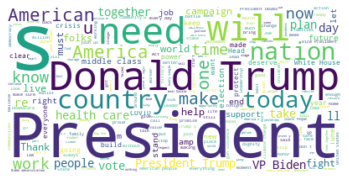

In [18]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["twitter", "tesla"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_words=300, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:

plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
from google.colab import files
joe_biden = files.upload()

Saving joe biden.jpg to joe biden (1).jpg


In [24]:
biden_mask = np.array(Image.open("joe biden (1).jpg"))
biden_mask

array([[[189, 175, 166],
        [192, 177, 170],
        [196, 181, 176],
        ...,
        [213, 200, 192],
        [216, 203, 195],
        [216, 203, 195]],

       [[190, 176, 167],
        [193, 178, 171],
        [198, 183, 178],
        ...,
        [213, 200, 192],
        [216, 203, 195],
        [216, 203, 195]],

       [[191, 177, 168],
        [194, 179, 172],
        [199, 184, 179],
        ...,
        [213, 200, 192],
        [216, 203, 195],
        [216, 203, 195]],

       ...,

       [[100,  40,  39],
        [103,  43,  42],
        [106,  46,  45],
        ...,
        [148, 112,  90],
        [149, 113,  91],
        [150, 114,  92]],

       [[102,  42,  41],
        [103,  43,  42],
        [105,  45,  44],
        ...,
        [148, 112,  90],
        [149, 113,  91],
        [149, 113,  91]],

       [[108,  48,  47],
        [106,  46,  45],
        [105,  45,  44],
        ...,
        [148, 112,  88],
        [148, 112,  88],
        [148, 112,  88]]

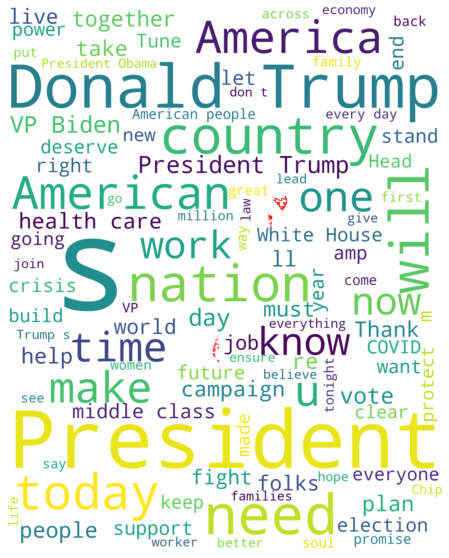

In [27]:
wc = WordCloud(background_color="white", max_words=100, mask=biden_mask,
               stopwords=stopwords, contour_width=3, contour_color='red')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("joe biden (1).png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()